In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}
plt.rc('font', **font)

In [3]:
DATA_FOLDER = '../data/clustering-results-kmeans/'
DATA_FILE = 'Data{}_{}.csv'
CLUSTERS_FILE = 'Clusters{}_{}.csv'
YEAR = 2010

In [4]:
# Setting plotting parameters
sns.set()
sns.set(rc={"figure.figsize": (14, 10)})

['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462']


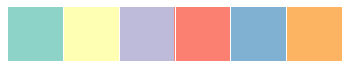

In [5]:
# Color palette
palette = sns.color_palette("Set3").as_hex()

print(palette)
sns.palplot(palette)

In [6]:
# Read data
data_file = DATA_FOLDER + DATA_FILE.format(YEAR - 2, YEAR)
clusters_file = DATA_FOLDER + CLUSTERS_FILE.format(YEAR - 2, YEAR)

data = pd.read_csv(data_file)
countries = pd.read_csv(clusters_file)

In [7]:
# Remove the last row (EU)
countries = countries[:-1]

# Convert cluster to integer (don't know why it's float in that file)
countries['cluster'] = countries['cluster'].astype(int)

In [8]:
def plot_clusters(countries, points):
    plt.scatter(points[:,0], points[:,1], s=70)
    
    for i, country in countries.iterrows():
        color = palette[country.cluster]
        
        plt.annotate(
            country['index'],
            points[i],
            bbox=dict(boxstyle='round,pad=0.8', color=color))

In [9]:
pca = PCA(n_components=2, svd_solver="full")
points = pca.fit_transform(data)

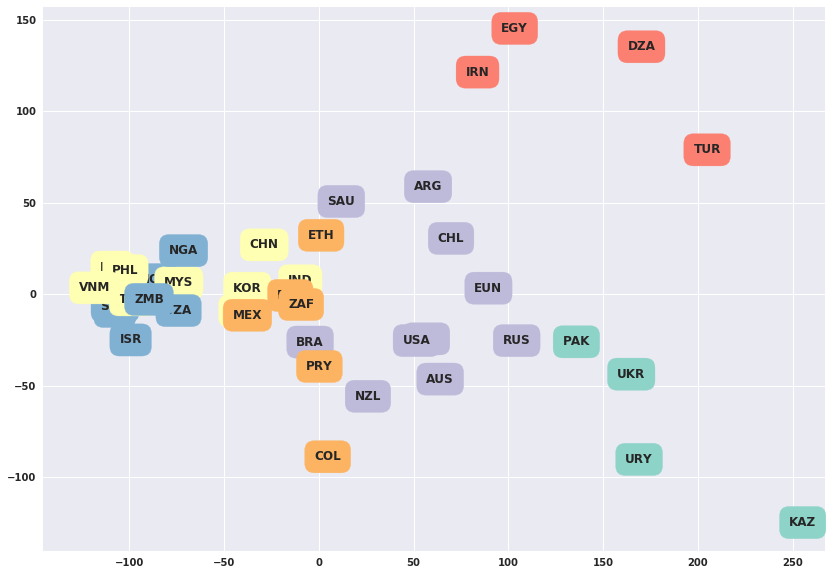

In [10]:
plot_clusters(countries, points)

In [11]:
tsne = TSNE(n_components=2, n_iter = 2000, random_state=42)
points = tsne.fit_transform(data)

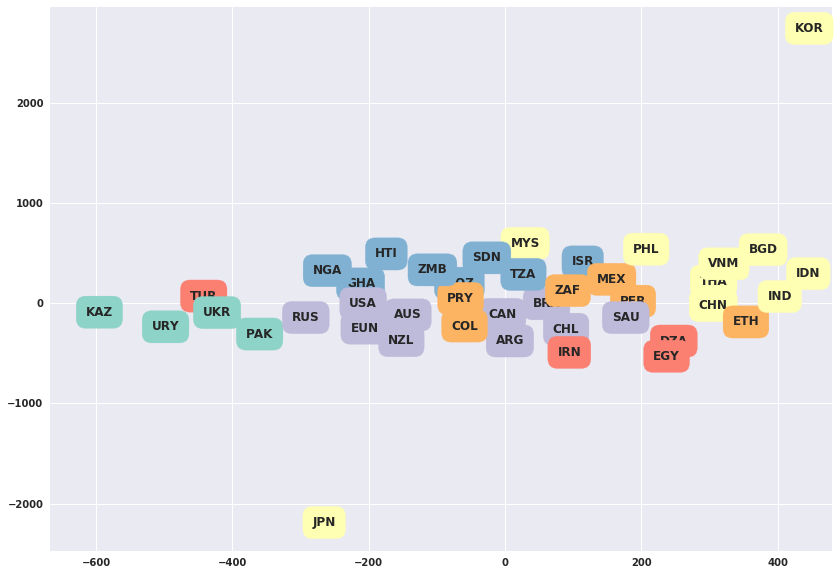

In [12]:
plot_clusters(countries, points)